In [4]:
import subprocess

# inner, outer, naive-row-wise
def run_experiment(dataflow, density):
    print("- starting experiment...")
    density=str(density)
    cmd="timeloop-mapper arch/sparse-exporation-architecture.yaml arch/components/*.yaml prob/prob" + density + ".yaml mapper/mapper.yaml constraints/" + dataflow + "-product-arch-constraints.yaml sparse-opt/" + dataflow + "-product.yaml  -o output/"
    subprocess.run(["timeloop-mapper","arch/sparse-exporation-architecture.yaml","arch/components/*.yaml","prob/prob" + density + ".yaml","mapper/mapper.yaml","constraints/" + dataflow + "-product-arch-constraints.yaml","sparse-opt/" + dataflow + "-product.yaml","-o","output/"],capture_output=True,text=True,bufsize=1)
    print("- done with experiment")

In [5]:
# Parse edp, energy, cycles, and area from log file
def parse_edp(pth):
    f=open(pth)
    log_txt=f.read()
    f.close()
    energy=float([s for s in log_txt.split("\n") if "Total topology energy" in s][0].split()[3])
    cycles=float([s for s in log_txt.split("\n") if "Max topology cycles" in s][0].split()[3])
    area=float([s for s in log_txt.split("\n") if "Total topology area" in s][0].split()[3])
    return {"edp":energy*cycles,"energy":energy,"cycles":cycles,"area":area}

In [37]:
from parse_timeloop_output import parse_timeloop_stats
import pickle

def dictappend(dct, key, value):
    if key in dct:
        dct[key] = dct[key] + [value]
    else:
        dct[key] = [value]
        
    return dct

#density = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]
density = [1.0]
density_str = [str(d) for d in density]
# experiment_str = ["inner", "outer", "naive-row-wise"]
experiment_str = ["inner"]
result = {}
detailed_result = {}

for ddx in range(len(density)):
    print("Density: " + density_str[ddx])
    for ex in experiment_str:
        print("- Experiment: " + ex + " product")
        run_experiment(ex, density_str[ddx])
        stats = parse_timeloop_stats('./output/timeloop-mapper.map+stats.xml')
        stats['edp_pJ_cycles'] = stats['energy_pJ']*stats['cycles']
        result = dictappend(result, ex, stats['edp_pJ_cycles'])
        detailed_result = dictappend(detailed_result, ex, stats)
        print("-- EDP: " + str(result[ex][ddx]) + " pJ-cycles")
        
pickle.dump( {"result":result,"detailed_result":result,"density":density, "experiment_str":experiment_str}, open( "./output/experiment_result.p", "wb" ) )

Density: 1.0
- Experiment: inner product
- starting experiment...
- done with experiment
-- EDP: 1274250851024508.0 pJ-cycles


In [ ]:
density

In [20]:
print(result)

{'inner': [1274250851023585.2, 1763935221586.24], 'outer': [765180652389662.8, 1763935221586.24]}


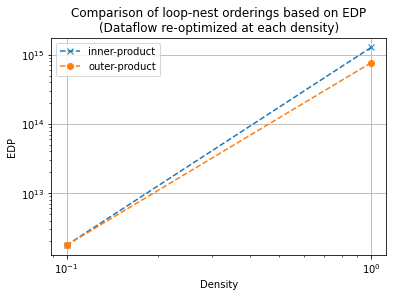

In [21]:

# importing package
import matplotlib.pyplot as plt
import numpy as np

marker_str = ["x","o","*"]

# plot lines
for ex in range(len(experiment_str)):
    ex_str = experiment_str[ex]
    plt.plot(density, [el for el in result[ex_str]], label = ex_str + "-product",marker=marker_str[ex],linestyle='--')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.title("Comparison of loop-nest orderings based on EDP\n(Dataflow re-optimized at each density)")
plt.xlabel("Density")
plt.ylabel("EDP")
plt.legend()
plt.show()

In [ ]:
# Parse SparseLoop XML output
import xml.etree.ElementTree as ET

# create element tree object
tree = ET.parse("timeloop-model.map+stats.xml")

# get root element
root = tree.getroot()

root.tag

root.attrib

for child in root:
    print(child.tag, child.attrib)
    
ET.dump(tree)

In [29]:
from parse_timeloop_output import parse_timeloop_stats

stats = parse_timeloop_stats('./output/timeloop-mapper.map+stats.xml')

stats

{'problem': [512, 512, 512],
 'utilization': 1.0,
 'cycles': 9962,
 'energy_pJ': 5320083430.253556,
 'energy_per_mac': 39.63771037946311,
 'macs': 134217728,
 'energy_breakdown_pJ': {'MAC': {'energy': 1430116.8295999998,
   'utilization': 1.0},
  'Buffer': {'energy': 2202044782.2558455,
   'storage_access_energy': 2202044782.2558455,
   'read_energy': 1384096454.2294512,
   'temporal_add_energy': 0.0,
   'spatial_add_energy': 0.0,
   'address_generation_energy': 0.0,
   'network_energy': 0.0,
   'energy_per_access_per_instance': array([4.25016   ,        nan, 6.07402552]),
   'reads_per_instance': array([524288,      0, 523264]),
   'updates_per_instance': array([     0,      0, 524288]),
   'fills_per_instance': array([1024,    0, 1024]),
   'accesses_per_instance': array([ 525312,       0, 1048576]),
   'instances': array([256, 256, 256]),
   'utilization': 0.11328125,
   'multicast': array([1, 1, 1]),
   'dist_multicast': array([0, 0, 0]),
   'num_hops': array([0.5, 0.5, 0.5]),
   '